## data_analysis
Simple data analysis

# 0. Initialization

## Dependencies

In [1]:
import numpy as np #math
import pandas as pd #dataframes
import seaborn as sn #plots
import matplotlib.pyplot as plt  #plots
from dython.nominal import associations #correlation matrix

# 1. Data

## Read in data

In [2]:
data = pd.read_csv("tweets_final.csv") 
print(len(data))
data.head(5)

1932


,Unnamed: 0,Unnamed: 0.1,id_str,Screen Name,User Name,Time,Followers,num_retweets,num_likes,date,...,reply,quote,tweet_type,num_emojis,emoji_polarity,length,party_affiliation,days_since_post,time_day,day_week
0,0,0,1.210867e+18,pvdabelgie,PVDA België,2019-12-28 10:17:26,10460,5,19,2019-12-28,...,False,False,normal,0,0.0,191,pvdabelgie,5,10,5
1,1,1,1.209871e+18,pvdabelgie,PVDA België,2019-12-25 16:16:48,10460,14,30,2019-12-25,...,False,False,normal,0,0.0,87,pvdabelgie,8,16,2
2,2,2,1.207912e+18,pvdabelgie,PVDA België,2019-12-20 06:33:56,10460,13,43,2019-12-20,...,False,False,normal,0,0.0,109,pvdabelgie,13,6,4
3,3,3,1.207627e+18,pvdabelgie,PVDA België,2019-12-19 11:39:33,10460,3,4,2019-12-19,...,False,False,normal,0,0.0,65,pvdabelgie,14,11,3
4,4,4,1.206876e+18,pvdabelgie,PVDA België,2019-12-17 09:58:19,10460,21,51,2019-12-17,...,False,False,normal,0,0.0,83,pvdabelgie,16,9,1


In [3]:
from datetime import datetime
from datetime import date
from sklearn.preprocessing import RobustScaler, StandardScaler
scaler = StandardScaler()

#numerical features
feature_cols = ['time_day', 'day_week', 'num_hashtags', 'num_hashtags_trending', 'num_mentions', 'num_urls', 'num_emojis', 'emoji_polarity', 'subjectivity', 'polarity', 'length', 'days_since_post'] 
X = data.loc[:, feature_cols].astype('float')

#categorical and boolean features
feature_cols = ['reply', 'quote', 'category', 'party_affiliation', 'media_type']
#feature_cols = ['tweet_type', 'category', 'party_affiliation', 'media_type']
#feature_cols = ['media_type', 'reply', 'quote', 'category']
#feature_cols = ['media_type', 'tweet_type', 'category']
#feature_cols = ['media_type', 'reply', 'quote']
X[feature_cols] = data.loc[:, feature_cols].astype('category')
target = data['target'].astype('category')

X.head(8)

,time_day,day_week,num_hashtags,num_hashtags_trending,num_mentions,num_urls,num_emojis,emoji_polarity,subjectivity,polarity,length,days_since_post,reply,quote,category,party_affiliation,media_type
0,10.0,5.0,0.0,0.0,1.0,1.0,0.0,0.0,0.25,0.182292,191.0,5.0,False,False,andere,pvdabelgie,nothing
1,16.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.00,0.000000,87.0,8.0,False,False,sociaal,pvdabelgie,nothing
2,6.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.00,0.000000,109.0,13.0,False,False,politiek,pvdabelgie,nothing
3,11.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.00,0.000000,65.0,14.0,False,False,ecologie,pvdabelgie,nothing
4,9.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.00,0.000000,83.0,16.0,False,False,politiek,pvdabelgie,nothing
5,11.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.25,-0.083333,209.0,17.0,False,False,economie,pvdabelgie,photo
6,10.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.60,-0.600000,68.0,17.0,False,False,zorg,pvdabelgie,nothing
7,15.0,3.0,4.0,0.0,2.0,1.0,0.0,0.0,0.00,0.000000,185.0,21.0,True,True,ecologie,pvdabelgie,photo


## Data manipulations

In [4]:
X['category'] = X['category'].fillna('andere')


## Histograms

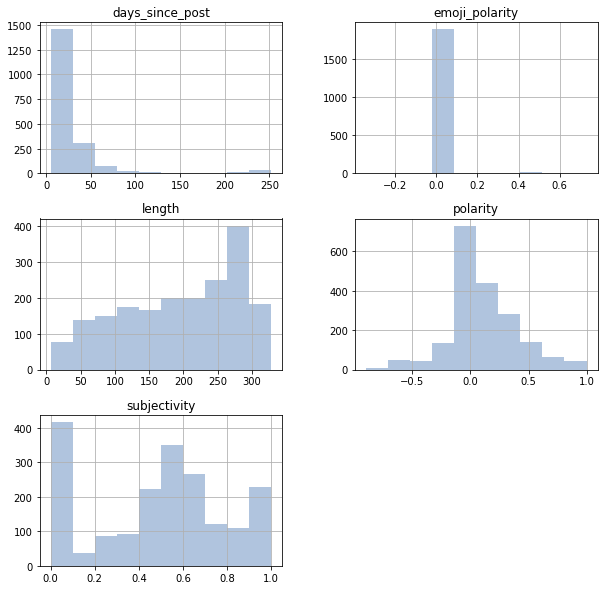

In [5]:
#histograms of float features or integer features with lots of different datapoints
X.hist(column=["length", "subjectivity", "polarity", "days_since_post", "emoji_polarity"], figsize = (10, 10), color = 'lightsteelblue')
plt.show()

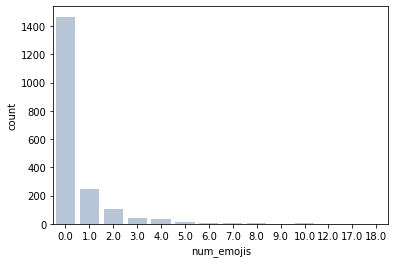

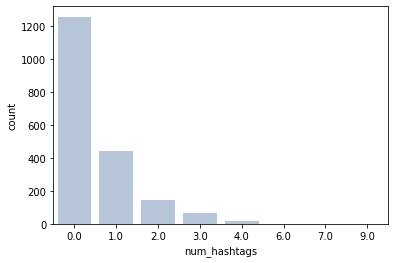

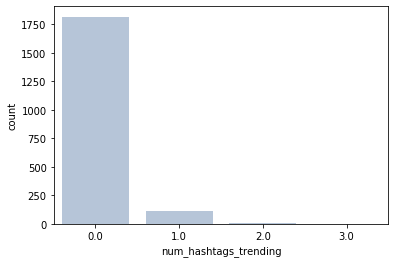

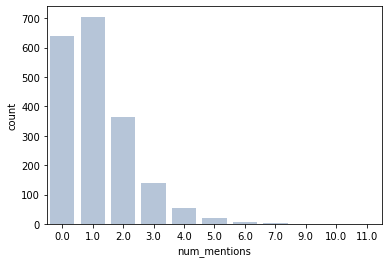

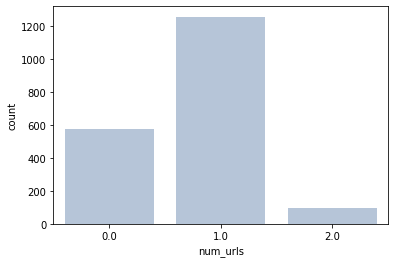

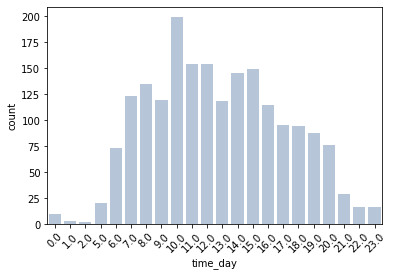

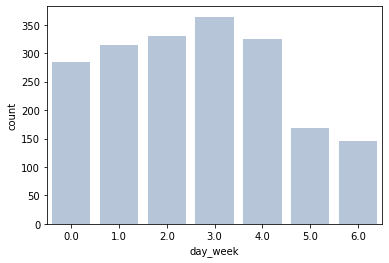

In [6]:
#histograms of integer features
p = sn.countplot(X['num_emojis'], color = 'lightsteelblue')
plt.show()
p = sn.countplot(X['num_hashtags'], color = 'lightsteelblue')
plt.show()

p = sn.countplot(X['num_hashtags_trending'], color = 'lightsteelblue')
plt.show()
p = sn.countplot(X['num_mentions'], color = 'lightsteelblue')
plt.show()

p = sn.countplot(X['num_urls'], color = 'lightsteelblue')
plt.show()
p = sn.countplot(X['time_day'], color = 'lightsteelblue')
p.set_xticklabels(p.get_xticklabels(), rotation=45)
plt.show()

p = sn.countplot(X['day_week'], color = 'lightsteelblue')
plt.show()

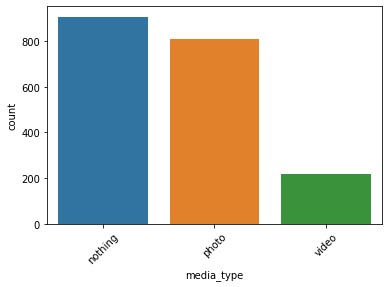

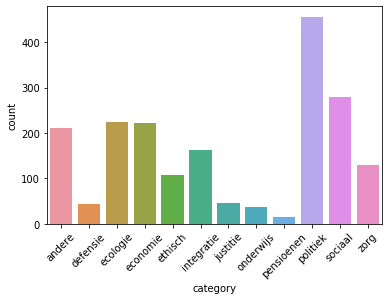

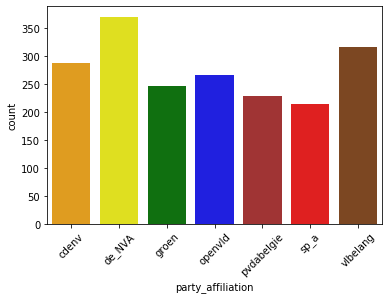

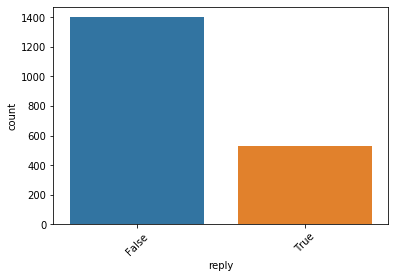

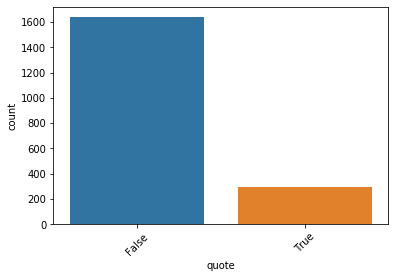

In [7]:
#fig, ax =plt.subplots(1,5)
p = sn.countplot(X['media_type'])
p.set_xticklabels(p.get_xticklabels(), rotation=45)
plt.show()
p = sn.countplot(X['category'])
p.set_xticklabels(p.get_xticklabels(), rotation=45)
plt.show()
palette ={"cdenv":"orange","de_NVA":"yellow","groen":"green", "openvld":"blue", "sp_a":"red","pvdabelgie":"firebrick", "vlbelang":"saddlebrown"}
p = sn.countplot(X['party_affiliation'], palette=palette)
p.set_xticklabels(p.get_xticklabels(), rotation=45)
plt.show()
#p = sn.countplot(X['tweet_type'])
p = sn.countplot(X['reply'])
p.set_xticklabels(p.get_xticklabels(), rotation=45)
plt.show()
p = sn.countplot(X['quote'])
p.set_xticklabels(p.get_xticklabels(), rotation=45)
plt.show()
#sn.countplot(X['media_type' ,'reply' ,'quote' ,'category' 'screen_name'], color = 'blue')

## Correlation matrix

/home/amdg/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


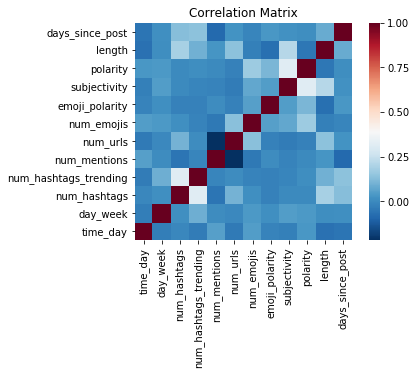

In [8]:
#correlation matrix only taking into account numeric features
X_c = X.copy()
correlation = X_c.corr(method='pearson')

fig = plt.figure()

plt.clf()
plt.title('Correlation Matrix')
#ax = plt.subplots(figsize=(20,15))

ax = fig.add_subplot(111)
ax.set_aspect(1)

#plt.subplots(figsize=(20,15))

#ax.set_aspect(1)
cmap = "RdBu_r"
#cmap = sn.cubehelix_palette(light=1, as_cmap=True) #not clear enough
#pl = sn.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns,cmap=cmap)

pl = sn.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, cmap = cmap)

#pl = sn.heatmap(correlation, annot=True, vmin=0.0, vmax=100.0, fmt='.2f', cmap=cmap)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
pl.invert_yaxis()

plt.savefig('correlation_matrix.png', dpi=100, bbox_inches='tight' )

/home/amdg/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


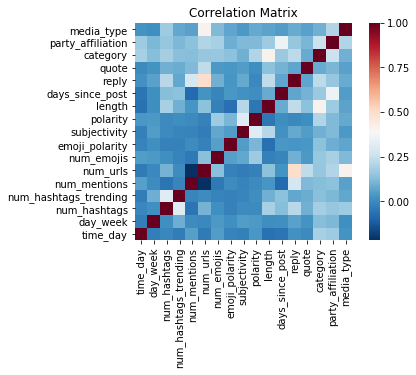

In [9]:
#correlation matrix taking into account categorical features
#Pearson's R for continuous-continuous cases
#Correlation Ratio for categorical-continuous cases
#Cramer's V for categorical-categorical cases
#correlation = associations(X_c, nominal_columns=['tweet_type','category', 'party_affiliation' , 'media_type'], plot = None, return_results = True, nan_strategy = 'drop_samples')
correlation = associations(X_c, nominal_columns=['reply', 'quote', 'category', 'party_affiliation' , 'media_type'], plot = None, return_results = True, nan_strategy = 'drop_samples')

fig = plt.figure()

plt.clf()
plt.title('Correlation Matrix')
#ax = plt.subplots(figsize=(20,15))

ax = fig.add_subplot(111)
ax.set_aspect(1)

#ax.set_aspect(1)
cmap = "RdBu_r"
#cmap = sn.cubehelix_palette(light=1, as_cmap=True) #not clear enough
#pl = sn.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns,cmap=cmap)

pl = sn.heatmap(correlation,xticklabels=correlation.columns, yticklabels=correlation.columns, cmap = cmap)
#pl = sn.heatmap(correlation, annot=True, vmin=0.0, vmax=100.0, fmt='.2f', cmap=cmap)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
pl.invert_yaxis()

In [10]:
print(correlation)

                       time_day  day_week  num_hashtags  \
time_day               1.000000 -0.031451     -0.007819   
day_week              -0.031451  1.000000      0.017013   
num_hashtags          -0.007819  0.017013      1.000000   
num_hashtags_trending -0.036747  0.091350      0.316969   
num_mentions           0.054814  0.005887     -0.054603   
num_urls              -0.041993 -0.000141      0.103978   
num_emojis             0.050751  0.041306      0.016945   
emoji_polarity        -0.013518  0.017556     -0.020365   
subjectivity          -0.026931  0.051732      0.005018   
polarity               0.034682  0.041984      0.003453   
length                -0.061905  0.013603      0.189088   
days_since_post       -0.055320  0.015846      0.132982   
reply                  0.021127  0.057901      0.223778   
quote                  0.003095  0.027846      0.098044   
category               0.187374  0.133827      0.185559   
party_affiliation      0.170962  0.119093      0.157062 